In [1]:
#Period 2: June 11-12, 2024
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import string

In [2]:
df_0610 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20240610.000110.custom.csv",
                     index_col=0)
df_0611 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20240611.000118.custom.csv",
                     index_col=0)
df_0612 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20240612.000543.custom.csv",
                     index_col=0)
df_0613 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20240613.000551.custom.csv",
                     index_col=0)

In [3]:
df_combined_p2 = pd.concat([df_0610, df_0611, df_0612, df_0613], ignore_index=True)

In [4]:
df_combined_p2[['date','time']] = (df_combined_p2['time_offset'].str.split('.', expand=True))

In [5]:
df_combined_p2.date = pd.to_datetime(df_combined_p2.date)

In [6]:
df_combined_p2.set_index("date", inplace=True)

In [7]:
df_combined_p2

,base_time,time_offset,status,chloride,ammonium,nitrate,total_organics,sulfate,f43,f44,...,heater_PWM,heater_I,heater_V,heater_T,servo2_PWM,servo3_PWM,lat,lon,alt,time
date,,,,,,,,,,,,,,,,,,,,,
2024-06-10 00:01:10,2024-06-10,2024-06-10 00:01:10.271999999,0.0,0.115,-0.218,-0.010,0.016,0.076,-0.18,-0.06,...,66.0,1.13,0.23,539.9,0.0,1240.0,-40.683304,144.68971,67.0,271999999
2024-06-10 00:11:10,2024-06-10,2024-06-10 00:11:10.147200000,0.0,0.109,-0.131,0.007,0.071,0.078,0.03,0.23,...,66.0,1.13,0.46,539.9,0.0,1240.0,-40.683304,144.68971,67.0,147200000
2024-06-10 00:21:10,2024-06-10,2024-06-10 00:21:10.022400000,0.0,0.076,-0.228,0.002,-0.092,0.075,-0.03,0.23,...,66.0,1.13,0.46,539.9,0.0,1240.0,-40.683304,144.68971,67.0,022400000
2024-06-10 00:31:09,2024-06-10,2024-06-10 00:31:09.897599999,0.0,0.119,-0.196,0.007,0.064,0.073,-0.05,0.28,...,66.0,1.13,0.46,539.9,0.0,1240.0,-40.683304,144.68971,67.0,897599999
2024-06-10 00:41:09,2024-06-10,2024-06-10 00:41:09.686400000,0.0,0.106,-0.193,0.030,-0.069,0.071,-0.08,0.25,...,66.0,1.13,0.46,539.9,0.0,1240.0,-40.683304,144.68971,67.0,686400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13 23:15:58,2024-06-13,2024-06-13 23:15:58.435200000,0.0,0.037,-0.115,0.028,0.314,0.065,0.02,0.41,...,66.0,1.13,0.23,540.0,0.0,1240.0,-40.683304,144.68971,67.0,435200000
2024-06-13 23:25:58,2024-06-13,2024-06-13 23:25:58.310400000,0.0,0.047,-0.150,0.055,0.361,0.072,0.05,0.37,...,66.0,1.13,0.46,540.0,0.0,1240.0,-40.683304,144.68971,67.0,310400000
2024-06-13 23:35:58,2024-06-13,2024-06-13 23:35:58.185600000,0.0,0.035,-0.184,0.027,0.366,0.062,0.06,0.39,...,66.0,1.13,0.46,540.0,0.0,1240.0,-40.683304,144.68971,67.0,185600000


In [9]:
species_to_plot = ["ammonium","nitrate","total_organics","sulfate"]

In [ ]:
#mean = df_combined[species_to_plot].resample("5min").mean()
#std = df_combined[species_to_plot].resample("5min").std()

<Axes: title={'center': '30-min average concentration during June 10-13, 2024'}, xlabel='Date/time', ylabel='Concentration (ug/m3)'>

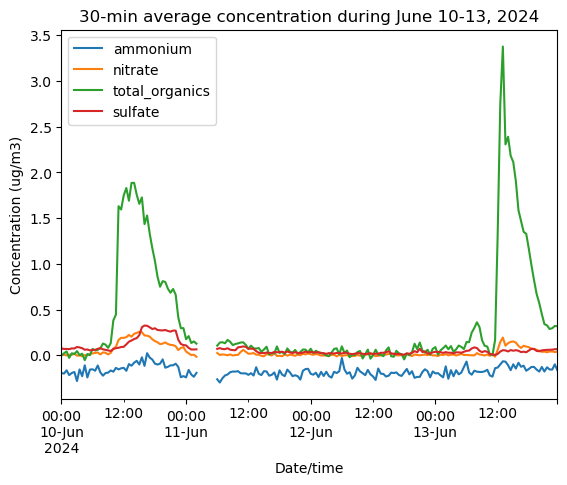

In [19]:
df_combined_p2[species_to_plot].resample("30min").mean().plot.line(xlabel='Date/time', ylabel='Concentration (ug/m3)',title='30-min average concentration during June 10-13, 2024')

In [12]:
#Period 2: Oct 6-8, 2024
df_1006 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20241006.000722.custom.csv",
                     index_col=0)
df_1007 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20241007.000730.custom.csv",
                     index_col=0)
df_1008 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20241008.000737.custom.csv",
                     index_col=0)

In [13]:
df_combined_p3 = pd.concat([df_1006, df_1007, df_1008], ignore_index=True)

In [14]:
df_combined_p3[['date','time']] = (df_combined_p3['time_offset'].str.split('.', expand=True))

In [15]:
df_combined_p3.date = pd.to_datetime(df_combined_p3.date)

In [16]:
df_combined_p3.set_index("date", inplace=True)

In [17]:
df_combined_p3

,base_time,time_offset,status,chloride,ammonium,nitrate,total_organics,sulfate,f43,f44,...,heater_PWM,heater_I,heater_V,heater_T,servo2_PWM,servo3_PWM,lat,lon,alt,time
date,,,,,,,,,,,,,,,,,,,,,
2024-10-06 00:07:22,2024-10-06,2024-10-06 00:07:22.051200000,0.0,0.131,-0.124,0.001,0.089,0.012,-0.05,0.08,...,66.0,1.13,0.46,538.9,0.0,1240.0,-40.683304,144.68971,67.0,051200000
2024-10-06 00:17:23,2024-10-06,2024-10-06 00:17:23.222399999,0.0,0.115,-0.180,-0.005,-0.008,0.037,-0.36,0.32,...,66.0,1.14,0.46,538.9,0.0,1240.0,-40.683304,144.68971,67.0,222399999
2024-10-06 00:27:21,2024-10-06,2024-10-06 00:27:21.801600000,0.0,0.176,-0.118,0.002,0.167,0.056,0.02,0.07,...,66.0,1.13,0.46,538.9,0.0,1240.0,-40.683304,144.68971,67.0,801600000
2024-10-06 00:37:22,2024-10-06,2024-10-06 00:37:22.972800000,0.0,0.204,-0.415,-0.046,0.157,0.057,0.04,0.06,...,66.0,1.13,0.23,538.9,0.0,1240.0,-40.683304,144.68971,67.0,972800000
2024-10-06 00:47:21,2024-10-06,2024-10-06 00:47:21.465599999,0.0,0.174,-0.282,-0.017,0.178,0.055,-0.00,0.10,...,66.0,1.13,0.46,538.9,0.0,1240.0,-40.683304,144.68971,67.0,465599999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-08 23:17:45,2024-10-08,2024-10-08 23:17:45.225600000,0.0,0.111,-0.215,0.029,0.097,0.072,-0.01,0.40,...,66.0,1.13,0.46,538.9,0.0,1240.0,-40.683304,144.68971,67.0,225600000
2024-10-08 23:27:43,2024-10-08,2024-10-08 23:27:43.804800000,0.0,0.059,-0.283,0.039,0.041,0.073,0.24,0.66,...,66.0,1.13,0.46,538.9,0.0,1240.0,-40.683304,144.68971,67.0,804800000
2024-10-08 23:37:44,2024-10-08,2024-10-08 23:37:44.976000000,0.0,0.024,-0.123,0.013,0.146,0.064,-0.01,0.19,...,66.0,1.13,0.46,538.9,0.0,1240.0,-40.683304,144.68971,67.0,976000000


<Axes: title={'center': '30-min average concentration during Oct 6-8, 2024'}, xlabel='Date/time', ylabel='Concentration (ug/m3)'>

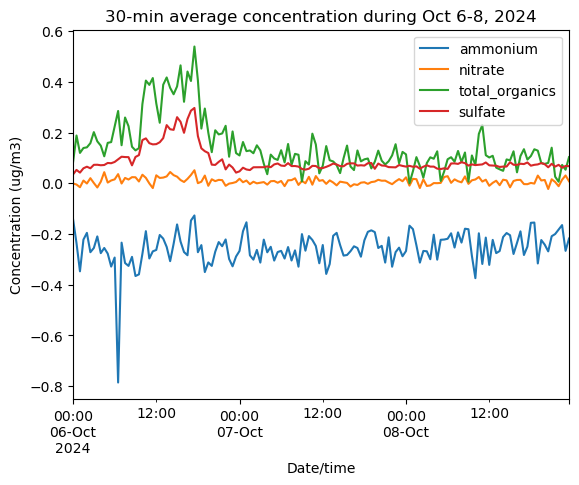

In [18]:
df_combined_p3[species_to_plot].resample("30min").mean().plot.line(xlabel='Date/time', ylabel='Concentration (ug/m3)',title='30-min average concentration during Oct 6-8, 2024')

In [20]:
#Period 4: Dec 10-12, 2024
df_1210 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20241210.000351.custom.csv",
                     index_col=0)
df_1211 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20241211.000359.custom.csv",
                     index_col=0)
df_1212 = pd.read_csv("../data/ACSM/kcgacsmtofspecX30.a1.20241212.000404.custom.csv",
                     index_col=0)

In [21]:
df_combined_p4 = pd.concat([df_1210, df_1211, df_1212], ignore_index=True)

In [22]:
df_combined_p4[['date','time']] = (df_combined_p4['time_offset'].str.split('.', expand=True))

In [23]:
df_combined_p4.date = pd.to_datetime(df_combined_p4.date)

In [24]:
df_combined_p4.set_index("date", inplace=True)

In [25]:
df_combined_p4

,base_time,time_offset,status,chloride,ammonium,nitrate,total_organics,sulfate,f43,f44,...,heater_PWM,heater_I,heater_V,heater_T,servo2_PWM,servo3_PWM,lat,lon,alt,time
date,,,,,,,,,,,,,,,,,,,,,
2024-12-10 00:03:51,2024-12-10,2024-12-10 00:03:51.148799999,0.0,0.138,-0.257,0.043,0.026,0.534,0.16,2.17,...,66.0,1.13,0.23,539.3,0.0,1240.0,-40.683304,144.68971,67.0,148799999
2024-12-10 00:13:52,2024-12-10,2024-12-10 00:13:52.320000000,0.0,0.141,-0.281,-0.008,-0.069,0.604,-0.02,-0.19,...,66.0,1.13,0.00,539.3,0.0,1240.0,-40.683304,144.68971,67.0,320000000
2024-12-10 00:23:53,2024-12-10,2024-12-10 00:23:53.491200000,0.0,0.142,-0.347,0.044,0.419,0.623,0.04,0.15,...,66.0,1.13,0.00,539.3,0.0,1240.0,-40.683304,144.68971,67.0,491200000
2024-12-10 00:33:52,2024-12-10,2024-12-10 00:33:52.070399999,0.0,0.153,-0.177,0.108,0.180,0.642,0.02,0.26,...,66.0,1.13,0.23,539.3,0.0,1240.0,-40.683304,144.68971,67.0,070399999
2024-12-10 00:43:53,2024-12-10,2024-12-10 00:43:53.241599999,0.0,0.120,-0.431,0.091,0.211,0.543,-0.04,0.26,...,66.0,1.13,0.23,539.3,0.0,1240.0,-40.683304,144.68971,67.0,241599999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-12 23:14:09,2024-12-12,2024-12-12 23:14:09.052800000,0.0,0.169,-0.319,0.061,0.218,0.356,0.04,0.03,...,66.0,1.13,0.23,539.2,0.0,1240.0,-40.683304,144.68971,67.0,052800000
2024-12-12 23:24:07,2024-12-12,2024-12-12 23:24:07.545600000,0.0,0.258,-0.201,-0.004,0.123,0.483,-0.01,0.59,...,66.0,1.13,0.23,539.2,0.0,1240.0,-40.683304,144.68971,67.0,545600000
2024-12-12 23:34:08,2024-12-12,2024-12-12 23:34:08.716800000,0.0,0.283,-0.566,0.079,0.228,0.642,0.06,0.07,...,66.0,1.13,0.23,539.2,0.0,1240.0,-40.683304,144.68971,67.0,716800000


<Axes: title={'center': '30-min average concentration during Dec 10-12, 2024'}, xlabel='Date/time', ylabel='Concentration (ug/m3)'>

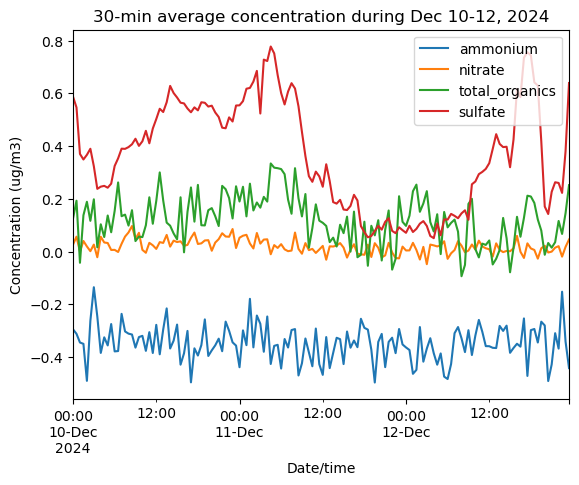

In [26]:
df_combined_p4[species_to_plot].resample("30min").mean().plot.line(xlabel='Date/time', ylabel='Concentration (ug/m3)',title='30-min average concentration during Dec 10-12, 2024')